In this notebook we will try to build optimized portfolio using the following methods:
1. Mean dispersion optimization
2. Risk parity optimization
3. Monte Carlo optimization

We will use the following libraries:
1. [Pandas](https://pandas.pydata.org/) for data manipulation
2. [Numpy](https://numpy.org/) for numerical computation
3. [Matplotlib](https://matplotlib.org/) for plotting
4. [Scipy](https://www.scipy.org/) for optimization
5. [PyPortfolioOpt](https://pyportfolioopt.readthedocs.io/en/latest/) for portfolio optimization
6. [Yfinance](https://pypi.org/project/yfinance/) for downloading stock data

We will use different stocks from different sectors to build our portfolio. Also we will use ETFs.

In [25]:
etf = ['VOO', 'QQQ', 'EMB', 'SCHD', 'JEPI', 'QYLD', 'DGRO']

ETFs:
1. VOO - Vanguard S&P 500 ETF 
2. QQQ - Invesco QQQ Trust (Mostly tech stocks, like Apple, Microsoft, Amazon, Nvidia, Meta)
3. EMB - iShares J.P. Morgan USD Emerging Markets Bond ETF
4. SCHD - Schwab US Dividend Equity ETF
5. JEPI - JPMorgan Equity Premium Income ETF
6. QYLD - Global X NASDAQ 100 Covered Call ETF
7. DGRO - iShares Core Dividend Growth ETF

In [26]:
stocks = ['O', 'AAPL', 'MSFT', 'KO', 'AMZN', 'MO', 'TSLA', 'JNJ', 'GOOGL', 'ABBV', 'VZ', 'T', 'PEP', 'PFE', 'NVDA']

Stocks:
1. O - Realty Income Corporation
2. AAPL - Apple Inc.
3. MSFT - Microsoft Corporation
4. KO - The Coca-Cola Company
5. AMZN - Amazon.com, Inc.
6. MO - Altria Group, Inc.
7. TSLA - Tesla, Inc.
8. JNJ - Johnson & Johnson
9. GOOGL - Alphabet Inc.
10. ABBV - AbbVie Inc.
11. VZ - Verizon Communications Inc.
12. T - AT&T Inc.
13. PEP - PepsiCo, Inc.
14. PFE - Pfizer Inc.
15. NVDA - NVIDIA Corporation

In [27]:
crypto = ['BTC-USD', 'ETH-USD', 'ADA-USD', 'BNB-USD', 'USDT-USD', 'XRP-USD', 'DOGE-USD']

Cryptocurrencies:
1. BTC-USD - Bitcoin
2. ETH-USD - Ethereum
3. ADA-USD - Cardano
4. BNB-USD - Binance Coin
5. USDT-USD - Tether
6. XRP-USD - XRP
7. DOGE-USD - Dogecoin

We will use the following time period:
Start date: 2021-01-01 -> End date: 2023-01-01

In [28]:
start_date = '2019-01-01'
middle_date = '2021-01-01'
end_date = '2023-01-01'

In [29]:
# Downloading data
import yfinance as yf
import pandas as pd

tickers = etf + stocks + crypto
data_train: pd.DataFrame = yf.download(tickers, start=start_date, end=middle_date)['Adj Close']
data_test: pd.DataFrame = yf.download(tickers, start=middle_date, end=end_date)['Adj Close']

[*********************100%%**********************]  29 of 29 completed
[*********************100%%**********************]  29 of 29 completed


In [30]:
data_train.head()

,AAPL,ABBV,ADA-USD,AMZN,BNB-USD,BTC-USD,DGRO,DOGE-USD,EMB,ETH-USD,...,PFE,QQQ,QYLD,SCHD,T,TSLA,USDT-USD,VOO,VZ,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,0.042547,NaN,6.075273,3843.520020,NaN,0.002392,NaN,140.819412,...,NaN,NaN,NaN,NaN,NaN,NaN,1.018335,NaN,NaN,0.364771
2019-01-02,37.893330,70.646538,0.045258,76.956497,6.188613,3943.409424,29.524101,0.002407,83.470039,155.047684,...,33.892612,150.242905,11.962039,39.581463,14.938530,20.674667,1.024012,212.120926,43.508099,0.375243
2019-01-03,34.118885,68.318825,0.042682,75.014000,5.903535,3836.741211,28.828783,0.002360,83.823517,149.135010,...,32.944397,145.334427,11.793635,38.806190,14.958755,20.024000,1.019473,207.057480,43.663437,0.360224
2019-01-04,35.575382,70.519836,0.043812,78.769501,6.065138,3857.717529,29.684555,0.002315,84.458115,154.581940,...,33.696701,151.552505,12.046237,39.876408,15.343093,21.179333,1.017200,213.891769,43.772163,0.356747
2019-01-05,NaN,NaN,0.044701,NaN,6.065543,3845.194580,NaN,0.002319,NaN,155.638596,...,NaN,NaN,NaN,NaN,NaN,NaN,1.018489,NaN,NaN,0.355275


In [31]:
pd.DataFrame(data_train, columns=tickers).isnull().sum()

VOO         226
QQQ         226
EMB         226
SCHD        226
JEPI        575
QYLD        226
DGRO        226
O           226
AAPL        226
MSFT        226
KO          226
AMZN        226
MO          226
TSLA        226
JNJ         226
GOOGL       226
ABBV        226
VZ          226
T           226
PEP         226
PFE         226
NVDA        226
BTC-USD       0
ETH-USD       0
ADA-USD       0
BNB-USD       0
USDT-USD      0
XRP-USD       0
DOGE-USD      0
dtype: int64

In [32]:
# Replace NaN values with the means of previous and next values
data_train.ffill(inplace=True)
data_train.bfill(inplace=True)

data_test.ffill(inplace=True)
data_test.bfill(inplace=True)

data_train.head()

,AAPL,ABBV,ADA-USD,AMZN,BNB-USD,BTC-USD,DGRO,DOGE-USD,EMB,ETH-USD,...,PFE,QQQ,QYLD,SCHD,T,TSLA,USDT-USD,VOO,VZ,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,37.893330,70.646538,0.042547,76.956497,6.075273,3843.520020,29.524101,0.002392,83.470039,140.819412,...,33.892612,150.242905,11.962039,39.581463,14.938530,20.674667,1.018335,212.120926,43.508099,0.364771
2019-01-02,37.893330,70.646538,0.045258,76.956497,6.188613,3943.409424,29.524101,0.002407,83.470039,155.047684,...,33.892612,150.242905,11.962039,39.581463,14.938530,20.674667,1.024012,212.120926,43.508099,0.375243
2019-01-03,34.118885,68.318825,0.042682,75.014000,5.903535,3836.741211,28.828783,0.002360,83.823517,149.135010,...,32.944397,145.334427,11.793635,38.806190,14.958755,20.024000,1.019473,207.057480,43.663437,0.360224
2019-01-04,35.575382,70.519836,0.043812,78.769501,6.065138,3857.717529,29.684555,0.002315,84.458115,154.581940,...,33.696701,151.552505,12.046237,39.876408,15.343093,21.179333,1.017200,213.891769,43.772163,0.356747
2019-01-05,35.575382,70.519836,0.044701,78.769501,6.065543,3845.194580,29.684555,0.002319,84.458115,155.638596,...,33.696701,151.552505,12.046237,39.876408,15.343093,21.179333,1.018489,213.891769,43.772163,0.355275


In [33]:
pd.DataFrame(data_train, columns=tickers).isnull().sum()

VOO         0
QQQ         0
EMB         0
SCHD        0
JEPI        0
QYLD        0
DGRO        0
O           0
AAPL        0
MSFT        0
KO          0
AMZN        0
MO          0
TSLA        0
JNJ         0
GOOGL       0
ABBV        0
VZ          0
T           0
PEP         0
PFE         0
NVDA        0
BTC-USD     0
ETH-USD     0
ADA-USD     0
BNB-USD     0
USDT-USD    0
XRP-USD     0
DOGE-USD    0
dtype: int64

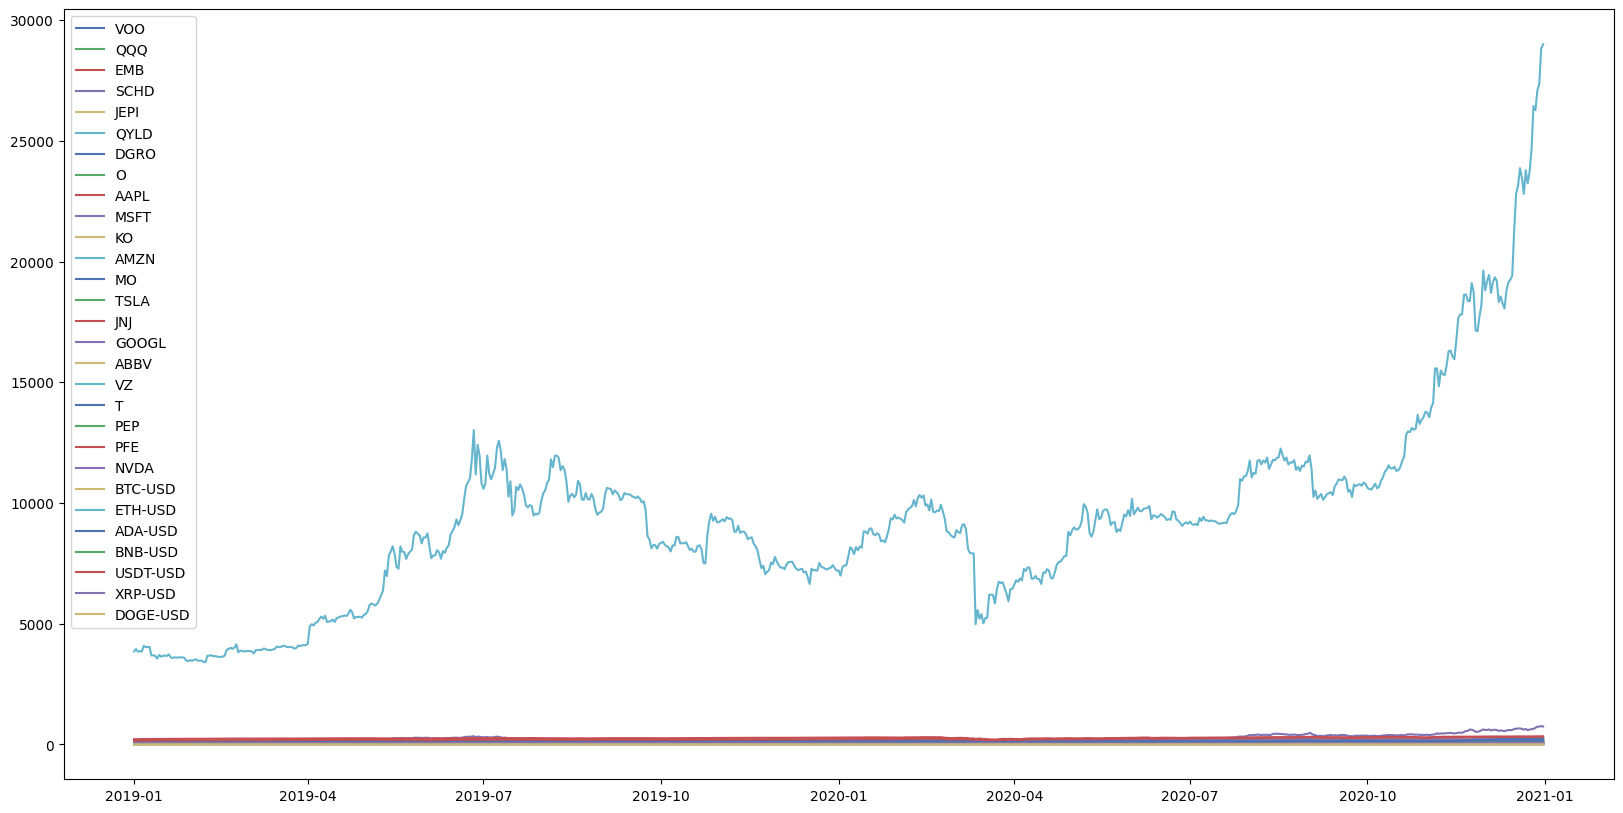

In [34]:
# Plotting data
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(data_train)
plt.legend(tickers)
plt.show()

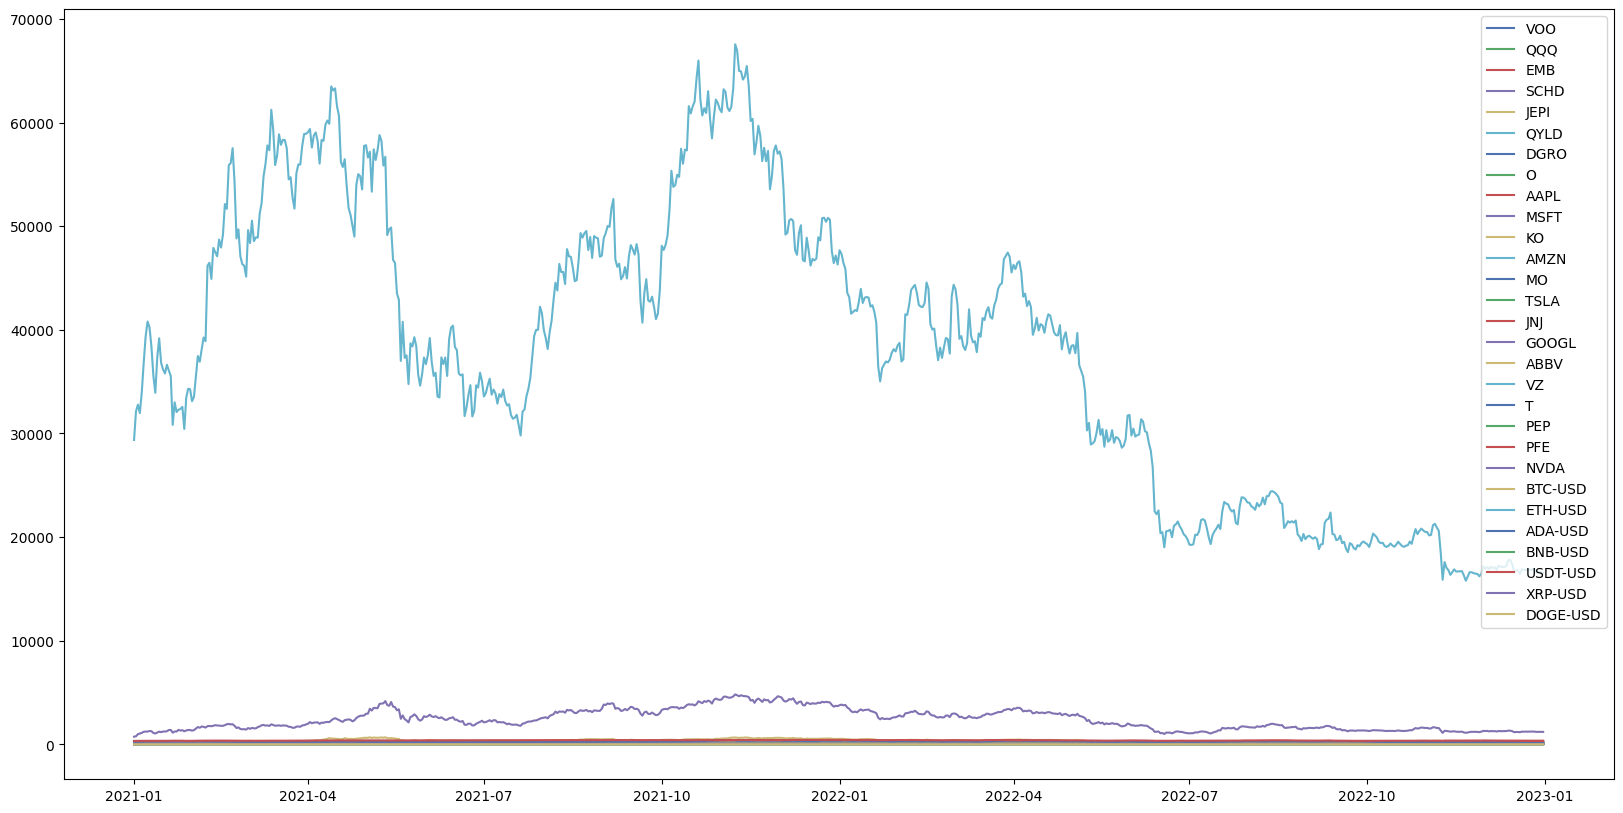

In [35]:
# Plotting data
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(data_test)
plt.legend(tickers)
plt.show()

In [36]:
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models 
from pypfopt import expected_returns
from pypfopt.cla import CLA
import pypfopt.plotting as pplt
from matplotlib.ticker import FuncFormatter

In [37]:
# Calculate expected yearly returns
mu = expected_returns.mean_historical_return(data_train, frequency=364)
# Calculate dispersion matrix
S = risk_models.sample_cov(data_train, frequency=364)
# Calculate max sharp ratio
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
raw_weights = sorted(ef.max_sharpe().items(), key=lambda x: x[1], reverse=True)
cleaned_weights = sorted(ef.clean_weights().items(), key=lambda x: x[1], reverse=True)

print("Expected annual return: {:.1f}%".format(100 * ef.portfolio_performance()[0]))
print("Annual volatility: {:.1f}%".format(100 * ef.portfolio_performance()[1]))
print("Sharpe Ratio: {:.2f}".format(ef.portfolio_performance()[2]))
print("Raw weights:")
for key, value in raw_weights:
    if value > 0:
        print("{}: {:.2f}%".format(key, value * 100))
print("Cleaned weights:")
for key, value in cleaned_weights:
    if value > 0:
        print("{}: {:.2f}%".format(key, value * 100))

Expected annual return: 101.3%
Annual volatility: 26.1%
Sharpe Ratio: 3.80
Raw weights:
JEPI: 47.27%
TSLA: 24.09%
BTC-USD: 17.84%
AAPL: 10.80%
Cleaned weights:
JEPI: 47.27%
TSLA: 24.09%
BTC-USD: 17.84%
AAPL: 10.79%


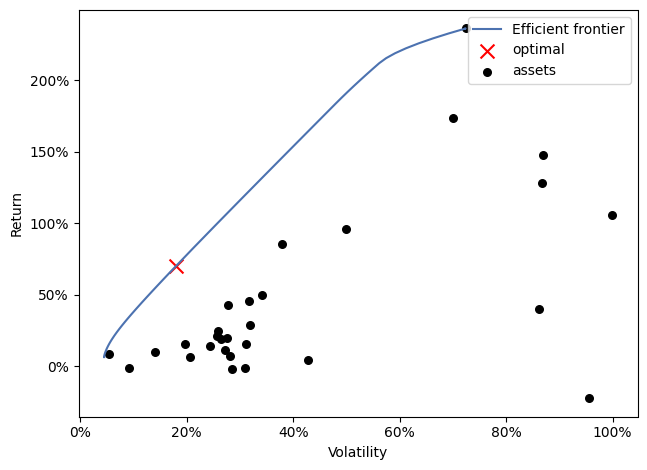

In [38]:
# Plotting efficient frontier
cl_obj = CLA(mu, S)
ax = pplt.plot_efficient_frontier(cl_obj, showfig = False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Mean dispersion optimization

In [39]:
import numpy as np
from scipy.optimize import minimize

# Calculate mean returns
mean_returns = data_train.mean()

mean_returns

AAPL          71.778682
ABBV          71.254056
ADA-USD        0.071168
AMZN         111.496159
BNB-USD       20.722557
BTC-USD     9258.357421
DGRO          35.372012
DOGE-USD       0.002653
EMB           92.857705
ETH-USD      244.742585
GOOGL         66.764480
JEPI          38.268322
JNJ          126.054151
KO            44.456156
MO            33.286737
MSFT         155.864436
NVDA          70.865933
O             54.252785
PEP          118.068911
PFE           31.273627
QQQ          213.280056
QYLD          13.829379
SCHD          47.152580
T             18.011339
TSLA          57.176973
USDT-USD       1.003082
VOO          264.471176
VZ            47.147019
XRP-USD        0.284015
dtype: float64

In [40]:
# Calculate standard deviation (dispersion)
std_dev = data_train.std()

std_dev

AAPL          26.910782
ABBV          10.174920
ADA-USD        0.035722
AMZN          29.546780
BNB-USD        7.385477
BTC-USD     4025.954725
DGRO           2.966738
DOGE-USD       0.000540
EMB            4.907390
ETH-USD      124.977929
GOOGL          9.886366
JEPI           1.889431
JNJ            8.621279
KO             3.702648
MO             3.041016
MSFT          36.471391
NVDA          34.626440
O              6.195167
PEP            9.588661
PFE            2.290526
QQQ           42.086087
QYLD           0.946039
SCHD           4.280268
T              1.901093
TSLA          55.833226
USDT-USD       0.005277
VOO           27.496361
VZ             2.268782
XRP-USD        0.089237
dtype: float64

## Define objective function

Objective function:

$$
\sigma = \sqrt{\sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij}}
$$

where:
- $w_i$ - weight of $i$-th asset
- $w_j$ - weight of $j$-th asset
- $\sigma_{ij}$ - covariance between $i$-th and $j$-th assets
- $n$ - number of assets
- $\sigma$ - standard deviation (dispersion)
- $\sigma_{ii}$ - variance of $i$-th asset
- $\sigma_{jj}$ - variance of $j$-th asset

In [41]:
# Define objective function
def objective(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(data_train.cov(), weights)))
    return portfolio_std_dev

## Define constraints and bounds

Constraints:
Sum of weights must be equal to 1

Bounds:
Weights must be between 0 and 1 (0 <= w <= 1)

Logical =)

In [42]:
# Define constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(mean_returns)))

In [43]:
# Define initial weights
init_w = np.array(len(mean_returns) * [1. / len(mean_returns)])

In [47]:
# Optimize portfolio
opt_results = minimize(objective, init_w, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = opt_results.x
connected = sorted(zip(tickers, optimal_weights), key=lambda x: x[1], reverse=True)

for ticker, weight in connected:
    if weight > 0:
        print(f"{ticker}: {weight:.10f}%")

O: 0.9634861678%
BNB-USD: 0.0364922922%
ETH-USD: 0.0000215947%
MO: 0.0000000005%
JNJ: 0.0000000002%
VZ: 0.0000000001%
SCHD: 0.0000000001%
QYLD: 0.0000000000%


In [48]:
# Calculate portfolio returns on test data
portfolio_returns = np.dot(data_test, optimal_weights)

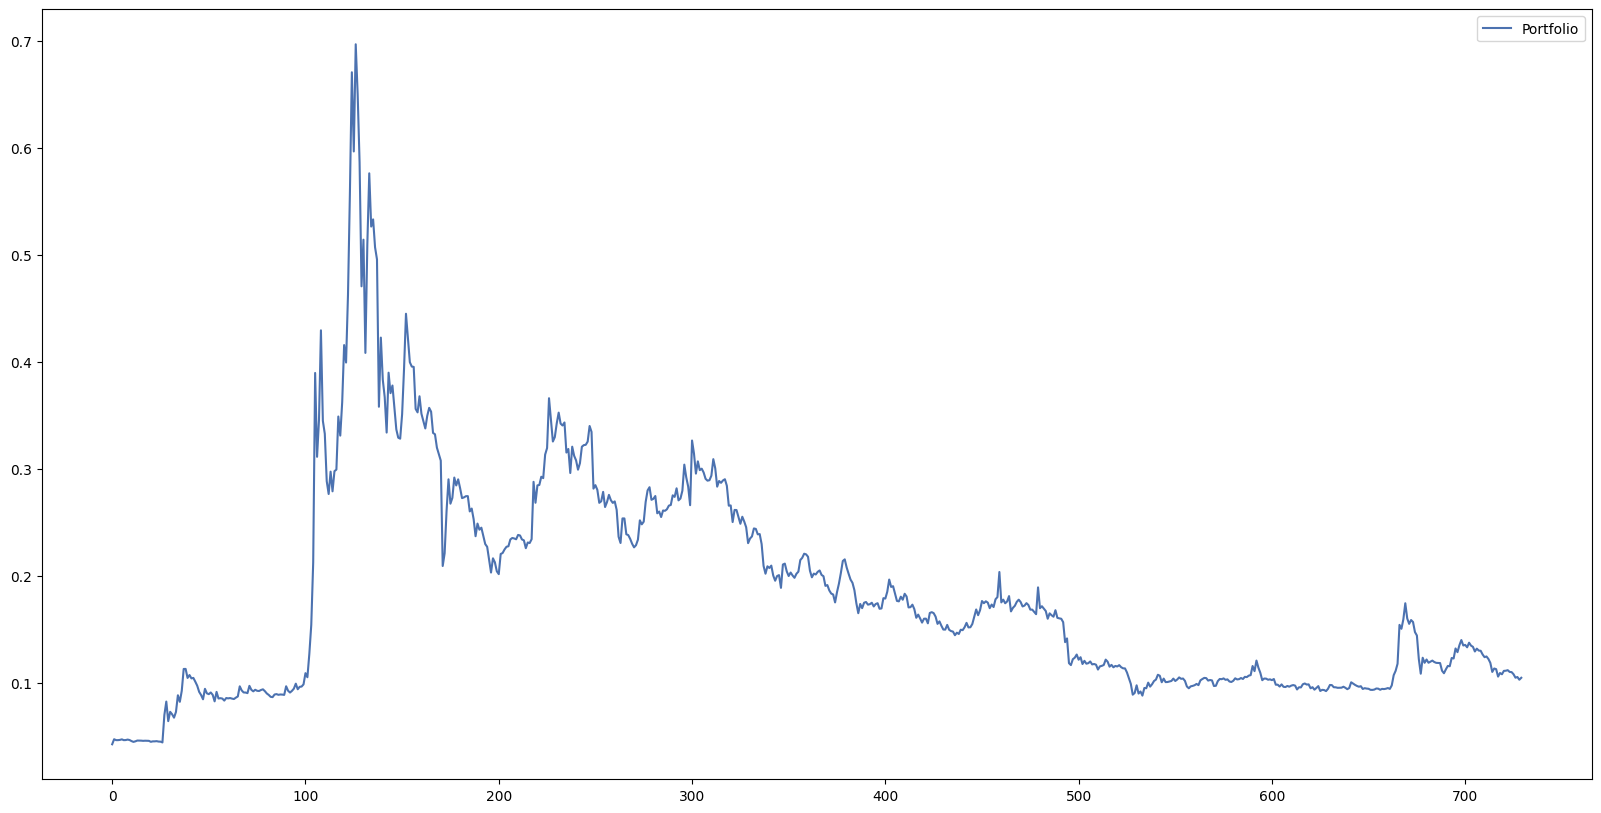

In [49]:
# Plot portfolio returns
plt.figure(figsize=(20, 10))
plt.plot(portfolio_returns)
plt.legend(['Portfolio'])
plt.show()

In [62]:
# Comparison
def calc(data, weights):
    portfolio_returns = np.dot(data, weights)
    
    expected_return = np.mean(portfolio_returns)
    std_dev = np.std(portfolio_returns)
    sharpe_ratio = expected_return / std_dev

    # Calculate max drawdown
    max_drawdown = max(np.maximum.accumulate(portfolio_returns) - portfolio_returns) * 100

    print(f"Sharpe ratio = {sharpe_ratio}, Max drawdown = {max_drawdown:.2f}'")

print("Train data:")
calc(data_train, optimal_weights)
print("Test data:")
calc(data_test, optimal_weights)

Train data:
Sharpe ratio = 11.869997906066319, Max drawdown = 129.19'
Test data:
Sharpe ratio = 7.115845135856896, Max drawdown = 395.51'


# Risk parity optimization

In [53]:
# Calculate covariance matrix
cov_matrix = data_train.cov()

## Define objective function

Objective function:

$$ f(w) = \sum_{i=1}^{n} \left( w_i \frac{\sigma_i}{\sigma_p} - \frac{1}{n} \right)^2 $$  where:  
$w_i$ is the weight of the $i$-th asset in the portfolio.
$\sigma_i$ is the standard deviation of the $i$-th asset.
$\sigma_p$ is the standard deviation of the portfolio, calculated as $\sqrt{w^T \Sigma w}$, where $w$ is the vector of weights and $\Sigma$ is the covariance matrix of the asset returns.
$n$ is the number of assets in the portfolio.
The objective of the optimization is to find the weights $w$ that minimize this function, subject to the constraints that the weights are non-negative and sum to 1. This ensures that the risk contributions of all assets in the portfolio are equal, achieving risk parity.

In [54]:
# Define objective function for risk parity
def objective(weights):
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)
    assets_std_dev = np.sqrt(np.diagonal(cov_matrix))
    risk_contributions = weights * assets_std_dev / portfolio_std_dev
    risk_parity_objective = np.sum((risk_contributions - 1/len(weights))**2)
    return risk_parity_objective

In [55]:
# Define constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(mean_returns)))

In [56]:
# Define initial weights
init_w = np.array(len(mean_returns) * [1. / len(mean_returns)])

In [57]:
# Optimize portfolio
opt_results = minimize(objective, init_w, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = opt_results.x
connected = sorted(zip(tickers, optimal_weights), key=lambda x: x[1], reverse=True)

for ticker, weight in connected:
    if weight > 0:
        print(f"{ticker}: {weight:.10f}%")

EMB: 0.5345929398%
DOGE-USD: 0.1758688427%
BNB-USD: 0.1100269270%
O: 0.0785752189%
NVDA: 0.0214642981%
AMZN: 0.0119180294%
XRP-USD: 0.0087457355%
ETH-USD: 0.0080903474%
DGRO: 0.0071739293%
PEP: 0.0071243149%
BTC-USD: 0.0051933788%
TSLA: 0.0049560250%
JNJ: 0.0042846005%
AAPL: 0.0039960168%
JEPI: 0.0026811045%
VZ: 0.0023267993%
MO: 0.0023231401%
T: 0.0022164174%
KO: 0.0020869071%
QQQ: 0.0018655897%
USDT-USD: 0.0007984983%
VOO: 0.0007880214%
SCHD: 0.0006643940%
ABBV: 0.0006171454%
GOOGL: 0.0005670973%
PFE: 0.0004944823%
ADA-USD: 0.0003846422%
MSFT: 0.0001700799%
QYLD: 0.0000050770%


In [58]:
# Calculate portfolio returns on test data
portfolio_returns = np.dot(data_test, optimal_weights)


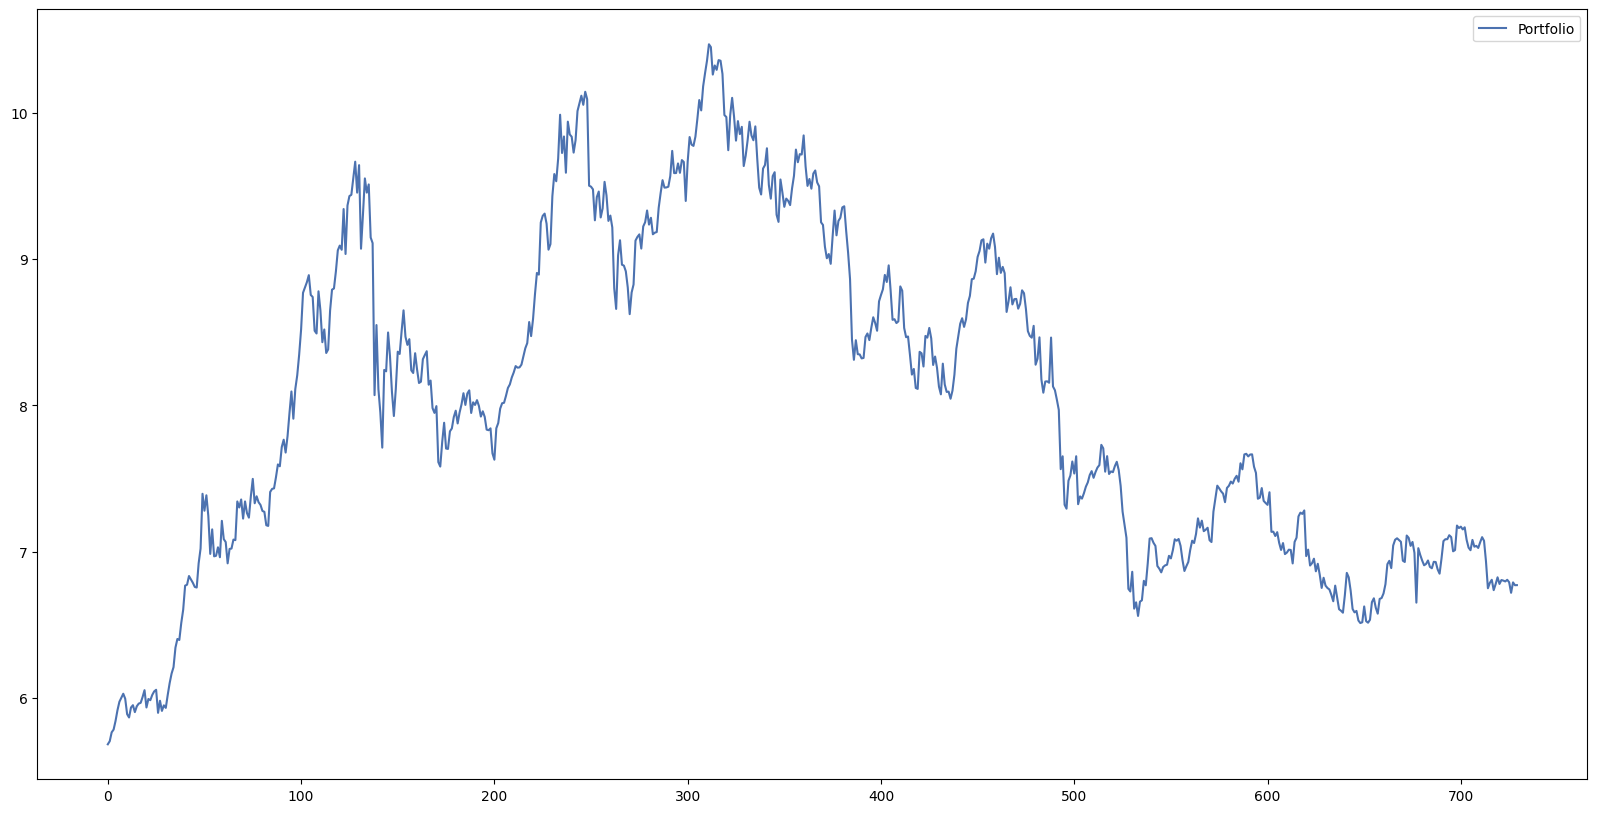

In [59]:
# Plot portfolio returns
plt.figure(figsize=(20, 10))
plt.plot(portfolio_returns)
plt.legend(['Portfolio'])
plt.show()

In [60]:
# Comparison
print("Train data:")
calc(data_train, optimal_weights)
print("Test data:")
calc(data_test, optimal_weights)

Train data:
Sharpe ratio = 11.869997906066319, Max drawdown = 129.19%
Test data:
Sharpe ratio = 7.115845135856896, Max drawdown = 395.51%


# Monte Carlo optimization

Description:
1. Generate random weights
2. Calculate portfolio return and volatility
3. Repeat steps 1 and 2 many times
4. Calculate Sharpe ratio for each portfolio
5. Find the portfolio with the highest Sharpe ratio
6. ...
7. Profit =)

In [66]:
import numpy as np

# Number of portfolios to simulate
num_portfolios = 10000

# Initialize arrays to store the portfolio weights, returns, and volatilities
all_weights = np.zeros((num_portfolios, len(mean_returns)))
all_returns = np.zeros(num_portfolios)
all_volatilities = np.zeros(num_portfolios)

# Simulate the portfolios
for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)

    # Calculate portfolio return and volatility
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Store the weights, return, and volatility
    all_weights[i, :] = weights
    all_returns[i] = portfolio_return
    all_volatilities[i] = portfolio_volatility

# Calculate the Sharpe ratio for each portfolio
sharpe_ratios = all_returns / all_volatilities

# Find the portfolio with the highest Sharpe ratio
max_index = np.argmax(sharpe_ratios)
optimal_weights = all_weights[max_index, :]

# Rebalance to get sum 1
optimal_weights /= np.sum(optimal_weights)

# Sort the weights
connected = sorted(zip(tickers, optimal_weights), key=lambda x: x[1], reverse=True)

sm = sum([weight for _, weight in connected])
print(f"Sum = {sm}")

# Print the optimal weights
for ticker, weight in connected:
    print(f"{ticker}: {weight:.2f}%")

Sum = 1.0
VZ: 0.08%
AMZN: 0.07%
BTC-USD: 0.07%
KO: 0.06%
USDT-USD: 0.05%
AAPL: 0.05%
ETH-USD: 0.05%
DOGE-USD: 0.04%
MO: 0.04%
BNB-USD: 0.04%
GOOGL: 0.04%
T: 0.04%
QQQ: 0.03%
JNJ: 0.03%
EMB: 0.03%
NVDA: 0.03%
SCHD: 0.03%
O: 0.03%
TSLA: 0.03%
ABBV: 0.03%
PEP: 0.03%
XRP-USD: 0.03%
VOO: 0.02%
ADA-USD: 0.02%
JEPI: 0.01%
PFE: 0.01%
MSFT: 0.01%
DGRO: 0.00%
QYLD: 0.00%


In [67]:
# Calculate portfolio returns on test data
portfolio_returns = np.dot(data_test, optimal_weights)

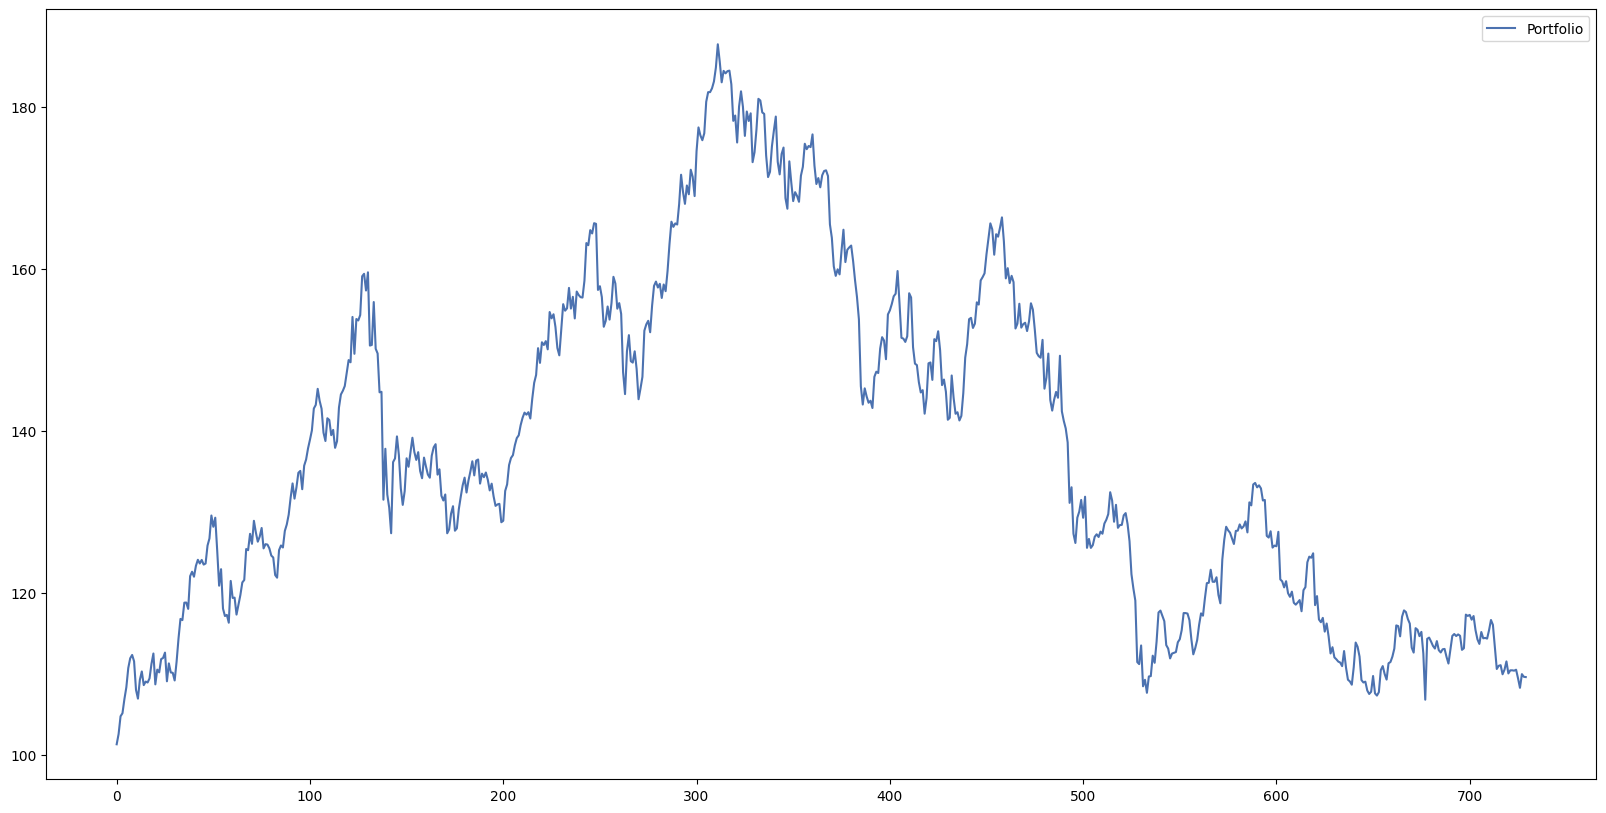

In [68]:
# Plot portfolio returns

plt.figure(figsize=(20, 10))
plt.plot(portfolio_returns)
plt.legend(['Portfolio'])
plt.show()

In [69]:
# Comparison
print("Train data:")
calc(data_train, optimal_weights)
print("Test data:")
calc(data_test, optimal_weights)

Train data:
Sharpe ratio = 6.910515341246814, Max drawdown = 2350.68'
Test data:
Sharpe ratio = 6.549811827934683, Max drawdown = 8090.96'
